## Importing necessary python libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [2]:
data= pd.read_csv("/workspaces/codespaces-jupyter/data/emp_rating.csv")

In [3]:
data.head()

,Emp Id,Sports,Religious,Nature,Theatre,Shopping,Picnic
0,Emp_1,2,77,79,69,68,95
1,Emp_2,2,62,76,76,69,68
2,Emp_3,2,50,97,87,50,75
3,Emp_4,2,68,77,95,76,61
4,Emp_5,2,98,54,59,95,86


## We can see that we have only numerical variables and emp_id is just a unique identification number of the employee. Lets set it as index

In [4]:
data.set_index('Emp Id',inplace = True)

### descriptive stats of the dataset

In [5]:
data.describe()

,Sports,Religious,Nature,Theatre,Shopping,Picnic
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,11.987952,109.779116,124.518072,116.377510,112.638554,120.401606
std,6.616501,32.454115,45.639372,32.132696,41.562888,32.633339
min,2.000000,50.000000,52.000000,59.000000,50.000000,61.000000
25%,6.000000,84.000000,89.000000,93.000000,79.000000,92.000000
50%,12.000000,104.000000,119.000000,113.000000,104.000000,119.000000
75%,18.000000,132.000000,153.000000,138.000000,138.000000,143.000000
max,25.000000,203.000000,318.000000,213.000000,233.000000,218.000000


## Visualize the spread of the variables using a boxplot

Text(0.5, 0.98, 'BOXPLOTS TO CHECK THE SPREAD OF VARIABLES')

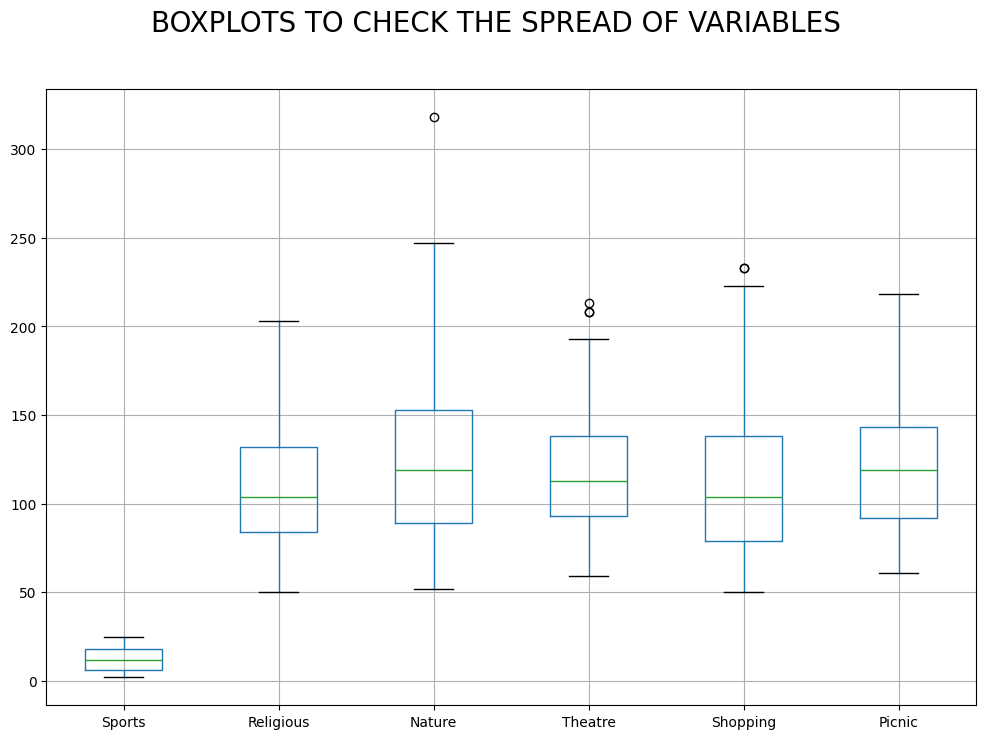

In [6]:
data.boxplot(figsize = (12,8), grid = True)
plt.suptitle('BOXPLOTS TO CHECK THE SPREAD OF VARIABLES', size = 20)

## Question-1: Do you find any difference in the scale of the variables? Is there an exception? Write your observations from the boxplots.

### Scale of Variables:

<b>X Axis is Categorical discrete variable</b> Activities Sports,Religious,Nature,Theatre,Shopping & Picnic
<b>Y Axis id Continutious Numerical variable</b> depicting No of Empoyees preferences from 0 to 350nos

### Exception:

<b>The Outlier is clealry visible in Incentive category Nature beyond the maxpoint</b>
Similarly in Incentive Category Theatre & Shopping the outlier is noticed

### Observations:

The Counts for Nature is 249, but the max point shows as 318 whcih is clearly an Outlier

<b>Median : The Median of the Sports is 12</b> indicates preference of smaller employee group
<b>Nature & Picnic</b>: The Median is highest for Nature & Picnic and it is 119
<b>Religious & Shopping</b> : The median is little less and similar for both and it is 104
<b>Theatre</b> : The median is second highest, it is 113

<b>Min & Max</b> Sports stands Minimum & Nature & Picnic are maximum preferred, other incentives stands second top

<b>Distribution</b> : Distribution of variables are <b>symentric with Postively Skewed distribution</b> for Nature, Religious,Picnic, Shopping& Theatre but
Perfectly symentric for Sports

<b>Dispersion</b>: Little Dispersion noticed for Nature (153-89=64), Shopping(138-79=59) & Religiousactivities (132-84=48)
    

## Lets check the co-relation matrix to understand the relationships

In [7]:
plt.figure(figsize = (10,8) )
ax = sns.heatmap(data.corr(),annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(6.5, -0.5)

## Question-2: What patterns do you observe here? What insights can you draw from the exploratory data analysis so far?

### Heat Map Pattern

The Vertical bar represent Cold region (Black) to Hot Region (Whitish) with Size of the Correlation between the Categorical variables (Activities)

Correlations, between Activities is Postive as well as negative, Correlation ranges from -1 to 1, The Whittish color represents hot & size of co-rrelation is 1.
The Diagonal Squares with size 1 represents they are highly correlated with themselves
Black color cold squares represents no co-rrelation, if the size is in negative it means they are negatively correlated, i.e preferance for one Activity increases other will decrease viceversa
Similarly if the correlation size is close to 1 & in positive, they are postively correlated,if preferance for one Activity increases other will alos increase

### Insight:

<b>Religious & Shopping</b>: The Correlation for Religious & Shopping is 0.9 almost 1 highly positively correlated, The employees those who prefer Religious also prefers Shopping equally

<b>Sports & Picnic</b>: The Correlation between these is second top 0.8, Preferance for Sports increases along with Picnic,i.e those who prefer Sports will also take Picnic.

<b>Sports with Religious,Nature & Theatre</b>: all three categories are correlated moderately
The employees segment prefers all these 4 items equally

<b>Nature  & Shopping</b>:These 2 Activities are negatively co-rrelated or no correlation it is -0.19,i.e Employee those who prefer Nature  will not prefer Shopping & viceversa, also they both cant be provided in single combo

<b>Religious & Nature </b>: These 2 items has no -correlation or negatively correlated with size -0.15, which means Employees those who prefer Religious wont prefer Nature  at a time & viceversa
They both cant be provided at one combo

Those who prefer Theatre may not prefer,Religious,Shopping & Picnic, as the correlation between them is almost cold purple in color,They only prefer Nature & Sports moderately.




In [8]:
from sklearn.preprocessing import MinMaxScaler

data_copy = data[:]
scaler = MinMaxScaler()
data_copy[data_copy.columns] = scaler.fit_transform(data_copy)

## Question-3: What did we do here? Why did we do it? 

### What did we do here
<b>Preprocessing of Numerical Variables</b> here No of Employee preferences for various activities

<b>Normalization</b>: Here all th enumerical variables (counts of employees for varies activities) has been normalized to fit within the range of 0 to 1 
    
Normalization is carried out using Min-Max Normalization Method : Subtracting the smallest datapoint & dividing the difference by the difference between highest & lowest data.

It is Scaling of datapoints between the range of 0 to 1,
    
<b>Why normalization:</b>
    
   To Build a better model
   Normalization done to bring all variables on same scale
   
    
    

### `Hopkins Statistic`

In [9]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def my_hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [10]:
my_hopkins(data_copy)

np.float64(0.8222720322152993)

## Question-4: According to Hopkins Statistic is there cluster tendency in the data?

Hopkins Statistic test, using 0.5 as the threshold to reject the alternative hypothesis. That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.

in other words, If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset is significantly a clusterable data.

### hopkins test Result is 0.83 close to 1
<b> Hence Reject the Null hyphothesis</b>
Conclude <b> there is a Significant Cluster Tendency in the data</b>

## Model building - KMeans

In [11]:
from sklearn.cluster import KMeans

### Choosing K by comparing Cost against each K¶

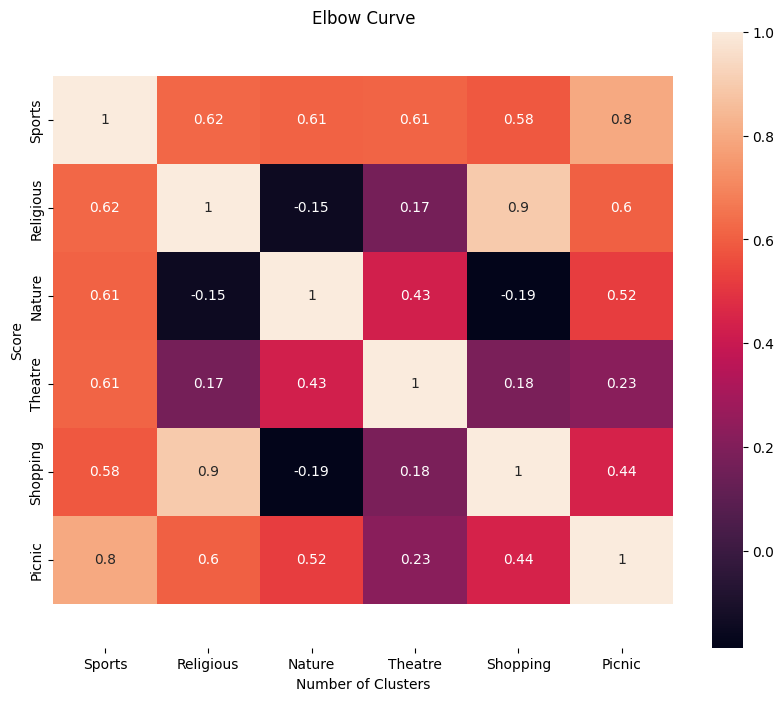

In [12]:
import pylab as pl
number_of_clusters = range(1,5)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(data_copy).score(data_copy) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## According to the Elbow Curve the optimum No of Clusters is 2. But, your management plans 3 different types of incentives to give to the customers. Hence we will be running K-Means with number of clusters as 3

## Question-5: Write the code for creating the KMeans clusters with number of clusters = 3.

### Hint: Use the function KMeans(n_clusters= no. of clusters ,max_iter=1000,random_state=42)

In [13]:
km = KMeans(n_clusters=3,max_iter=1000,random_state=42).fit(data_copy)
labels = pd.DataFrame(km.labels_)
fitClusters = km.fit_predict(data_copy)

In [14]:
#Kmeans with no of cluster 3 

### Combining the predicted clusters with the original DF.¶

In [15]:
copy_2 = data_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters)
data['k_mean_pred'] = fitClusters
clustersDf.columns = ['k_mean_pred']
combinedDf = pd.concat([copy_2, clustersDf], axis = 1)
combinedDf.set_index('Emp Id',inplace = True)
combinedDf.head()

,Sports,Religious,Nature,Theatre,Shopping,Picnic,k_mean_pred
Emp Id,,,,,,,
Emp_1,0.0,0.176471,0.101504,0.064935,0.098361,0.216561,2
Emp_2,0.0,0.078431,0.090226,0.110390,0.103825,0.044586,2
Emp_3,0.0,0.000000,0.169173,0.181818,0.000000,0.089172,2
Emp_4,0.0,0.117647,0.093985,0.233766,0.142077,0.000000,2
Emp_5,0.0,0.313725,0.007519,0.000000,0.245902,0.159236,2


## Analysing the segments based on the clusters created by K-means clustering Model

In [ ]:
temp = ['K means clustering'] 
a = 0
for x in  ['k_mean_pred']:
    plt.figure(figsize = (15,8))
    c = 1
    for variables in  data.columns[:-1]:
        plt.subplot(2,3,c)
        sns.boxplot(x= x, y= variables , data= data)
        c +=1

        plt.subplots_adjust(wspace=0.50)
    plt.suptitle('Different Segments of Employees - ' + temp[a])
    a +=1

## Now that the segments have been created, we need to profile each segment for reporting

## Question-6: What are the major differences between Employee Segment 0 and Employee Segment 1?

### Observations

<b>Employee Segment 0 Interested on high on Pasta,Non-Veg, Fries & fruits</b>whereas Employee segment 1 prefers more on Lentils,& prefers Brownie 7 Pasta moderately

Major Difference
<b>Emploee Segment 0</b>: Shows interest in all type of food items
also the Median is high when compared to Segement 1 for all food items

<b>Employee segment 1</b>: They show preferences  moderately interested only  max on Brownie & Lentils

## Question-7: Which of the employee segments does not show much interest in any kind of leisure activity?

### Employee Segment 2 does not show much interest to any kind of leisure activity

### on comparing all 3 employee segments in box plots for various leisure activities,
<b>On Median of Employee segment is low</b> for all the types of leisure activities